<a href="https://colab.research.google.com/github/xavigonzalvo/bonds_recession/blob/master/bonds_recession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xmltodict

In [0]:
import urllib
import xmltodict
import datetime
import numpy as np

In [0]:
def homepage(year):
  with urllib.request.urlopen('https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%20{}'.format(year)) as f:
    data = f.read()
  data = xmltodict.parse(data)
  return data

In [4]:
def _process_date(date_time_str):
  return datetime.datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S')


print(_process_date('2008-03-03T00:00:00').year)

2008


In [0]:
YEARS = []
for year in range(1990, 2020):
  YEARS.append(year)

In [6]:
yield_bond_data = {}
for year in YEARS:
  print('--->', year)
  yield_bond_data.update({year: {}})
  data = homepage(year)
  for month in range(1, 13):
    yield_bond_data[year].update({
        month: {
            'one_year': [],
            'five_years': [],
            'ten_years': []}})
  for entry in data['feed']['entry']:
    properties = entry['content']['m:properties']
    date = _process_date(properties['d:NEW_DATE']['#text'])
    year_month_data = yield_bond_data[date.year][date.month]
    if '#text' in properties['d:BC_1YEAR']:
      one_year = properties['d:BC_1YEAR']['#text']
      year_month_data['one_year'].append(one_year)
    if '#text' in properties['d:BC_5YEAR']:
      five_years = properties['d:BC_5YEAR']['#text']
      year_month_data['five_years'].append(five_years)
    if '#text' in properties['d:BC_10YEAR']:
      ten_years = properties['d:BC_10YEAR']['#text']
      year_month_data['ten_years'].append(ten_years)

---> 1990
---> 1991
---> 1992
---> 1993
---> 1994
---> 1995
---> 1996
---> 1997
---> 1998
---> 1999
---> 2000
---> 2001
---> 2002
---> 2003
---> 2004
---> 2005
---> 2006
---> 2007
---> 2008
---> 2009
---> 2010
---> 2011
---> 2012
---> 2013
---> 2014
---> 2015
---> 2016
---> 2017
---> 2018
---> 2019


In [0]:
# Average per month
average_yield_bond_data = yield_bond_data.copy()
for year, year_data in average_yield_bond_data.items():
  for month, month_data in year_data.items():
    one_year = average_yield_bond_data[year][month]['one_year']
    if len(one_year) > 1:
      average_yield_bond_data[year][month]['one_year'] = np.mean(
          list(map(float, one_year)))
    else:
      average_yield_bond_data[year][month]['one_year'] = one_year
    five_years = average_yield_bond_data[year][month]['five_years']
    if len(five_years) > 1:
      average_yield_bond_data[year][month]['five_years'] = np.mean(
          list(map(float, five_years)))
    else:
      average_yield_bond_data[year][month]['five_years'] = five_years
    ten_years = average_yield_bond_data[year][month]['ten_years']
    if len(ten_years) > 1:
      average_yield_bond_data[year][month]['ten_years'] = np.mean(
          list(map(float, ten_years)))
    else:
      average_yield_bond_data[year][month]['ten_years'] = ten_years

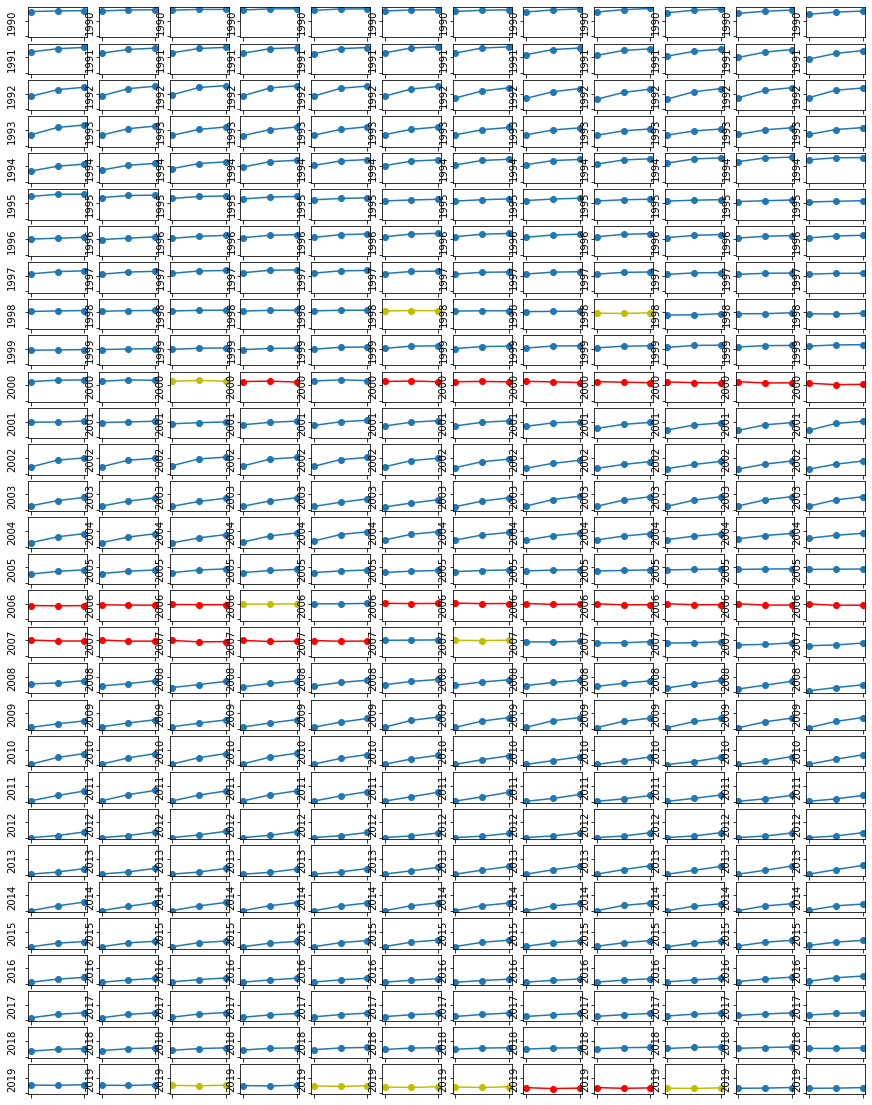

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(YEARS), 12, sharex=True, sharey=True, figsize=(15, 20))
for c, year in enumerate(YEARS):
  for month in range(1, 13):
    month_data = average_yield_bond_data[year][month]
    if not month_data['ten_years']:
      continue
    if month_data['ten_years'] < month_data['one_year']:
      axs[c, month - 1].plot([month_data['one_year'], month_data['five_years'], month_data['ten_years']], 'r-o')
    elif abs(month_data['ten_years'] - month_data['one_year']) < 0.1:
      axs[c, month - 1].plot([month_data['one_year'], month_data['five_years'], month_data['ten_years']], 'y-o')
    else:
      axs[c, month - 1].plot([month_data['one_year'], month_data['five_years'], month_data['ten_years']], '-o')
    axs[c, month - 1].set_yticklabels([])
    axs[c, month - 1].set_ylabel(year)
    axs[c, month - 1].set_xticklabels([])

In [9]:
average_yield_bond_data

{1990: {1: {'five_years': 8.119523843129477,
   'one_year': 7.92095236551194,
   'ten_years': 8.206666719345819},
  2: {'five_years': 8.424736775849995,
   'one_year': 8.11105261350933,
   'ten_years': 8.47315788269043},
  3: {'five_years': 8.600454503839666,
   'one_year': 8.350000034679066,
   'ten_years': 8.588636354966598},
  4: {'five_years': 8.768000030517578,
   'one_year': 8.404499959945678,
   'ten_years': 8.785500049591064},
  5: {'five_years': 8.735909115184437,
   'one_year': 8.316363551399924,
   'ten_years': 8.75818174535578},
  6: {'five_years': 8.430476234072732,
   'one_year': 8.096190452575684,
   'ten_years': 8.480000041780018},
  7: {'five_years': 8.33095241728283,
   'one_year': 7.940952437264579,
   'ten_years': 8.471428417024159},
  8: {'five_years': 8.436521737471871,
   'one_year': 7.779130438099736,
   'ten_years': 8.752608713896379},
  9: {'five_years': 8.513684172379342,
   'one_year': 7.763157844543457,
   'ten_years': 8.89315780840422},
  10: {'five_years'